In [10]:
#Backend People start here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import STL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-17,35.220716,35.712980,35.161550,35.395847,95174000,0.0,0.0
2017-07-18,35.310646,35.530747,35.185213,35.518913,71475200,0.0,0.0
2017-07-19,35.613584,35.836052,35.488151,35.741386,83692000,0.0,0.0
2017-07-20,35.854975,35.911776,35.544942,35.580441,68974800,0.0,0.0
2017-07-21,35.497618,35.604118,35.234918,35.563885,105010400,0.0,0.0


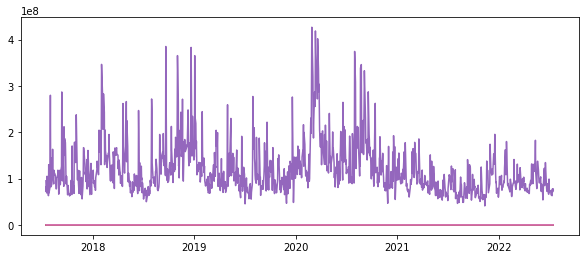

In [11]:
data = yf.Ticker("AAPL").history(period=str('5y'))

plt.figure(figsize=(10,4))
plt.plot(data)
data.head()

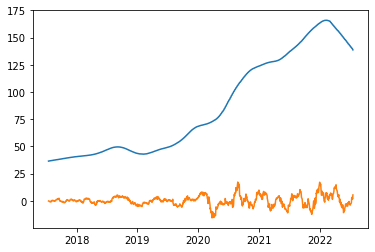

In [12]:
hiLowAvg = data
hiLowAvg['Average Price'] = (hiLowAvg['High'] + hiLowAvg['Low'])/2
hiLowAvg = hiLowAvg.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
hiLowAvg.head()

stl = STL(hiLowAvg, period = 100)
result = stl.fit()

trend, seasonal, residual = result.trend, result.seasonal, result.resid

plt.plot(trend)
plt.plot(residual)

In [13]:
print(trend)

Date
2017-07-17     36.461680
2017-07-18     36.498172
2017-07-19     36.534644
2017-07-20     36.571097
2017-07-21     36.607532
                 ...    
2022-07-11    139.953198
2022-07-12    139.645189
2022-07-13    139.336673
2022-07-14    139.027666
2022-07-15    138.718181
Name: trend, Length: 1259, dtype: float64


In [ ]:
#Trend Fit